<a href="https://colab.research.google.com/github/smartie20/smartie20/blob/main/LAST_ASSIN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES IMPORTION

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,svm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#TRAIN-TEST SPLITING AND DATASET READING

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#SHAPE AND SIZE FITTING

In [ ]:
x_train=x_train/225
x_test=x_test/255
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

#DATA PROCESSING

##ONE HOT ENCODING FOR Y

In [ ]:
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

##NORMALIZATION FOR X

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

#SLICING

##SLICING STEP TO MAKE THE DATA FIT THE REQUIREMENTS(30000 TRAINING SAMPLES , 5000 VALIDATION SAMPLES) FOR DNN

In [ ]:
x_train1=x_train[:30000]
y_train1=y_train_hot[:30000]
x_val=x_train[30000:35000]
y_val=y_train_hot[30000:35000]

###SLICING CHECK

In [ ]:
x_train1.shape

(30000, 784)

In [ ]:
x_val.shape

(5000, 784)

##SLICING STEP TO MAKE THE DATA FIT THE REQUIREMENTS(30000 TRAINING SAMPLES , 5000 TESTING SAMPLES) FOR THE NEXT THREE MODELS

In [ ]:
x_train2=x_train[5000:35000]
y_train2=y_train[5000:35000]
x_test=x_test[:5000]
y_test=y_test[:5000]

###SLICING CHECK

In [ ]:
x_train2.shape

(30000, 784)

In [ ]:
x_test.shape

(5000, 784)

#MODEL SELECTION

##MODEL1:- DNN

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')
                                  ])

###FITTING AND OPTIMIZATION

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.categorical_crossentropy,metrics=['acc'])

NameError: ignored

In [ ]:
model.fit(x=x_train1,y=y_train1,batch_size=32,epochs=20,verbose=1,validation_data=(x_val,y_val))

Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.6875 - acc: 0.7902 - val_loss: 0.3182 - val_acc: 0.9062
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3585 - acc: 0.8938 - val_loss: 0.2557 - val_acc: 0.9242
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2985 - acc: 0.9134 - val_loss: 0.2273 - val_acc: 0.9310
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2687 - acc: 0.9214 - val_loss: 0.2066 - val_acc: 0.9368
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2455 - acc: 0.9280 - val_loss: 0.2007 - val_acc: 0.9414
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2277 - acc: 0.9315 - val_loss: 0.1782 - val_acc: 0.9480
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2169 - acc: 0.9354 - val_loss: 0.1712 - val_acc: 0.9502
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.

###ACCURACY_LOSS GRAPH

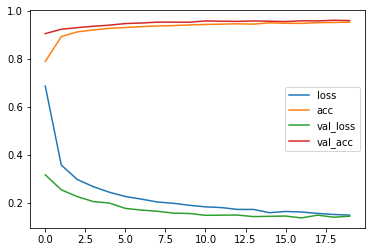

In [ ]:
hist_df=pd.DataFrame(model.history.history)
hist_df.plot()

###PREDICTION AND REZULTS FOR DNN

In [ ]:
pred=model.predict(x_test)
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(5000,), dtype=int64, numpy=array([7, 2, 1, ..., 2, 4, 0])>

In [ ]:
y_test

array([7, 2, 1, ..., 2, 4, 0], dtype=uint8)

##MODEL2:-SUPPORT VECTOR MACHINE

In [ ]:
SVM_model=svm.SVC()
SVM_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###PREDICTION AND RESULTS FOR SVM

In [ ]:
y_pred =SVM_model.predict(x_test)

In [ ]:
print("accuracy_score : ",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

accuracy_score :  0.974
recall_score :  0.974
Precision Score :  0.9740096208799998
f1_score :  0.9739558527933303


##MODEL3:-DECISION TREE

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

###PREDICTION AND RESULTS FOR DECISION TREE

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8588
recall_score :  0.8588
Precision Score :  0.8590720290727102
f1_score :  0.8584923089283302


##MODEL4:-KNEIGHBORS CLASSIFIER

In [ ]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

###PREDICTION AND RESULTS FOR KNEIGHBORS CLASSIFIER

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall_score : ",metrics.recall_score(y_test, y_pred,average='weighted'))
print("Precision Score : ", metrics.precision_score(y_test, y_pred,average='weighted'))
print("f1_score : ",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9614
recall_score :  0.9614
Precision Score :  0.9616490678571988
f1_score :  0.9613227692168055


#SELECTING THE BEST MODEL

***BY COMARING LOSSES AND ACCURACIES OF THE FOUR MODELS WE FOUND SUPPORT VECTOR MACHINE (SVM) IS THE BEST MODEL BECAUSE THE MODEL HAS THE HIGHEST ACCURACY RATE AND LOWEST LOSS***

#IMPORTANT NOTES

# **CHANGE THE RUNTIME TYPE TO GPU TO PREVENT WASTING TIME DURING THE TRAINFITTING OF THE MODELS**